# Kmeans Clustring

refrence => https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

tutorial => Machine Learning A-Z™ Hands On Python & R In Data Science (Udemy)


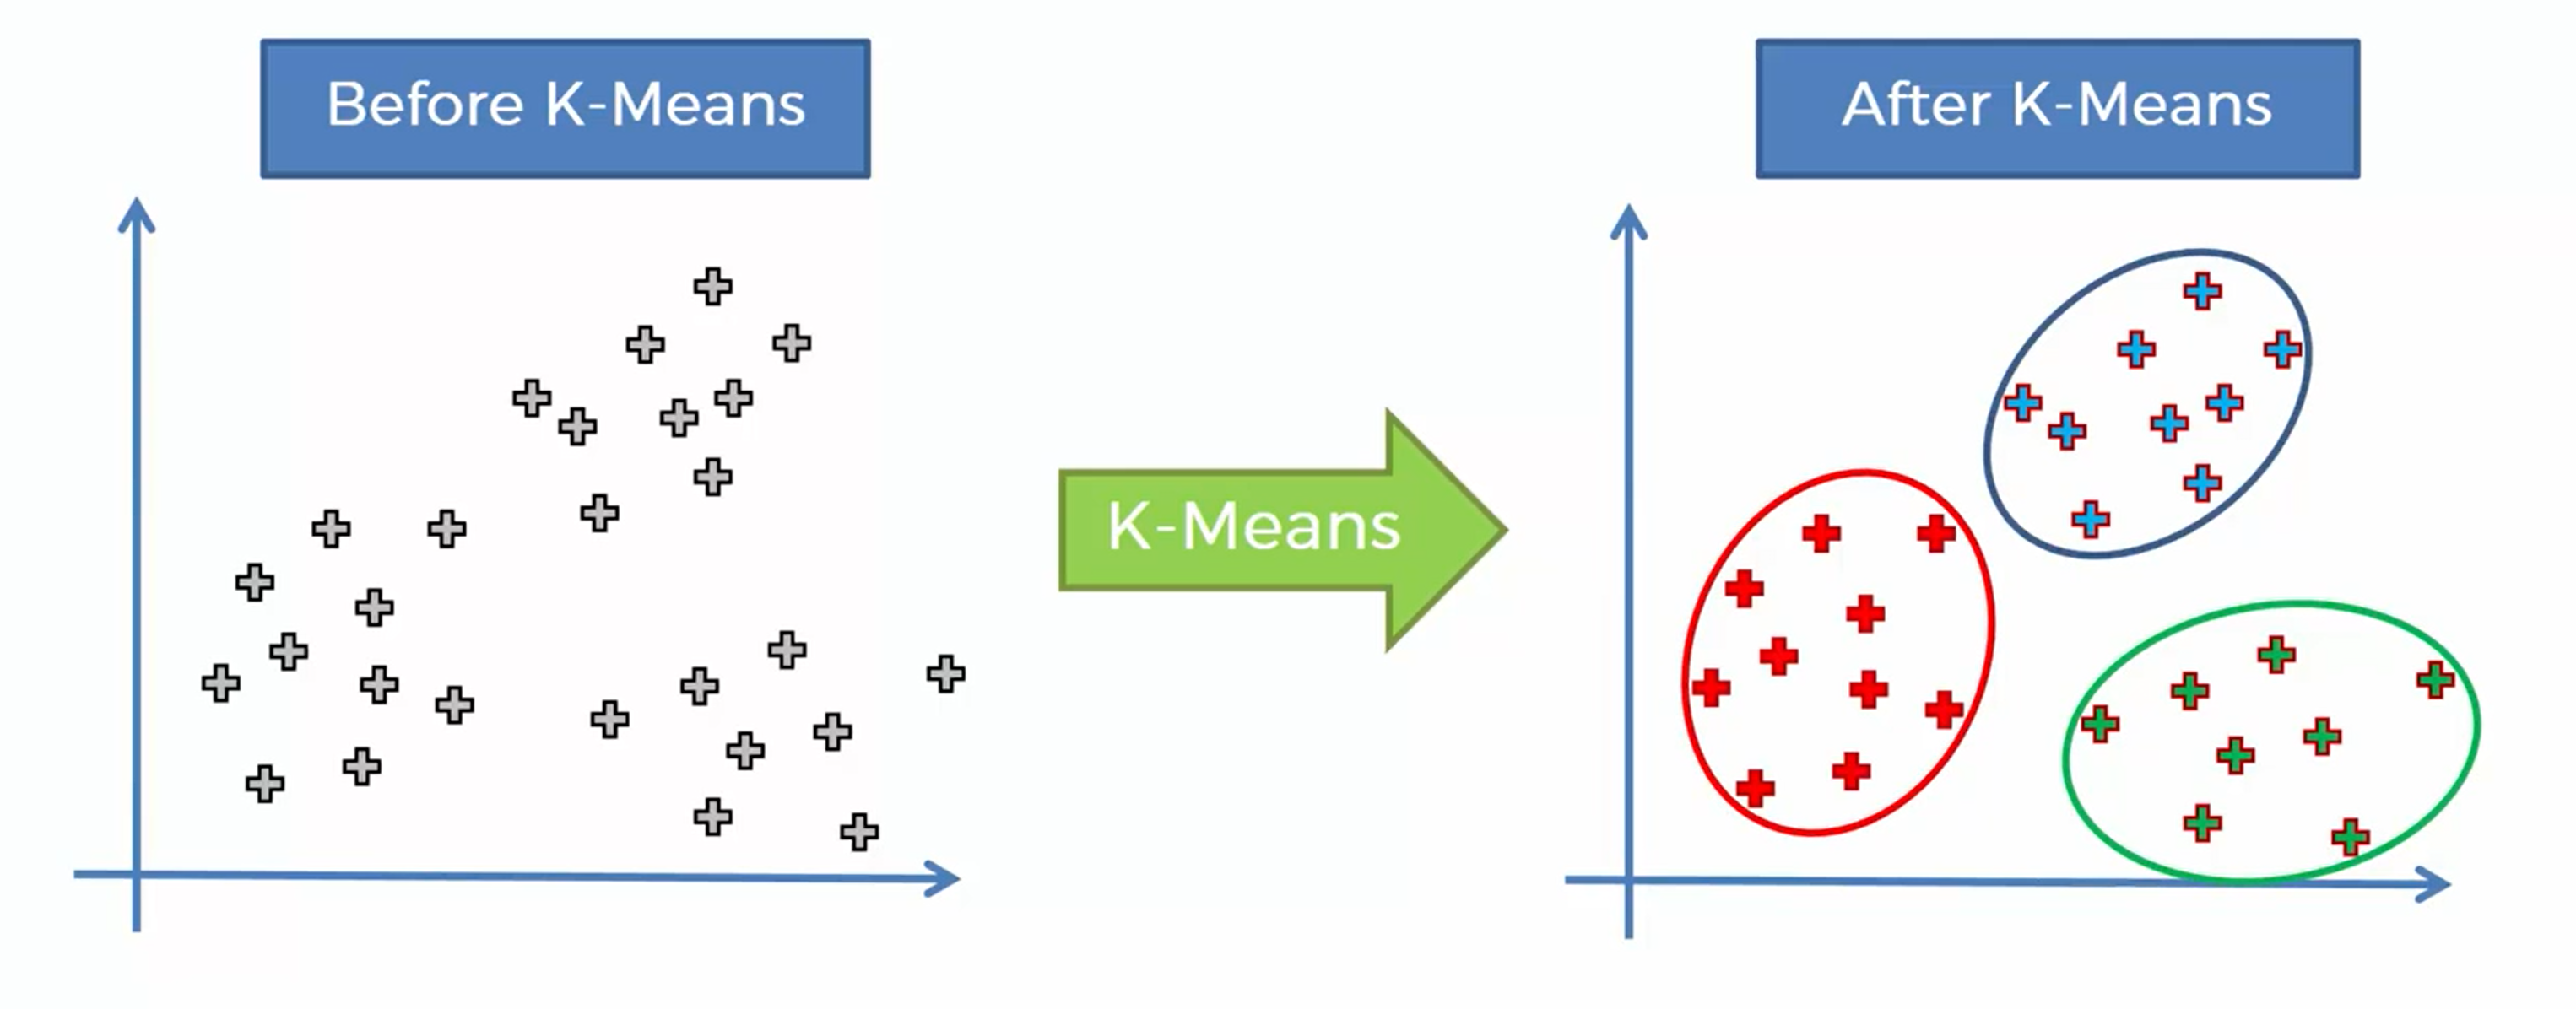

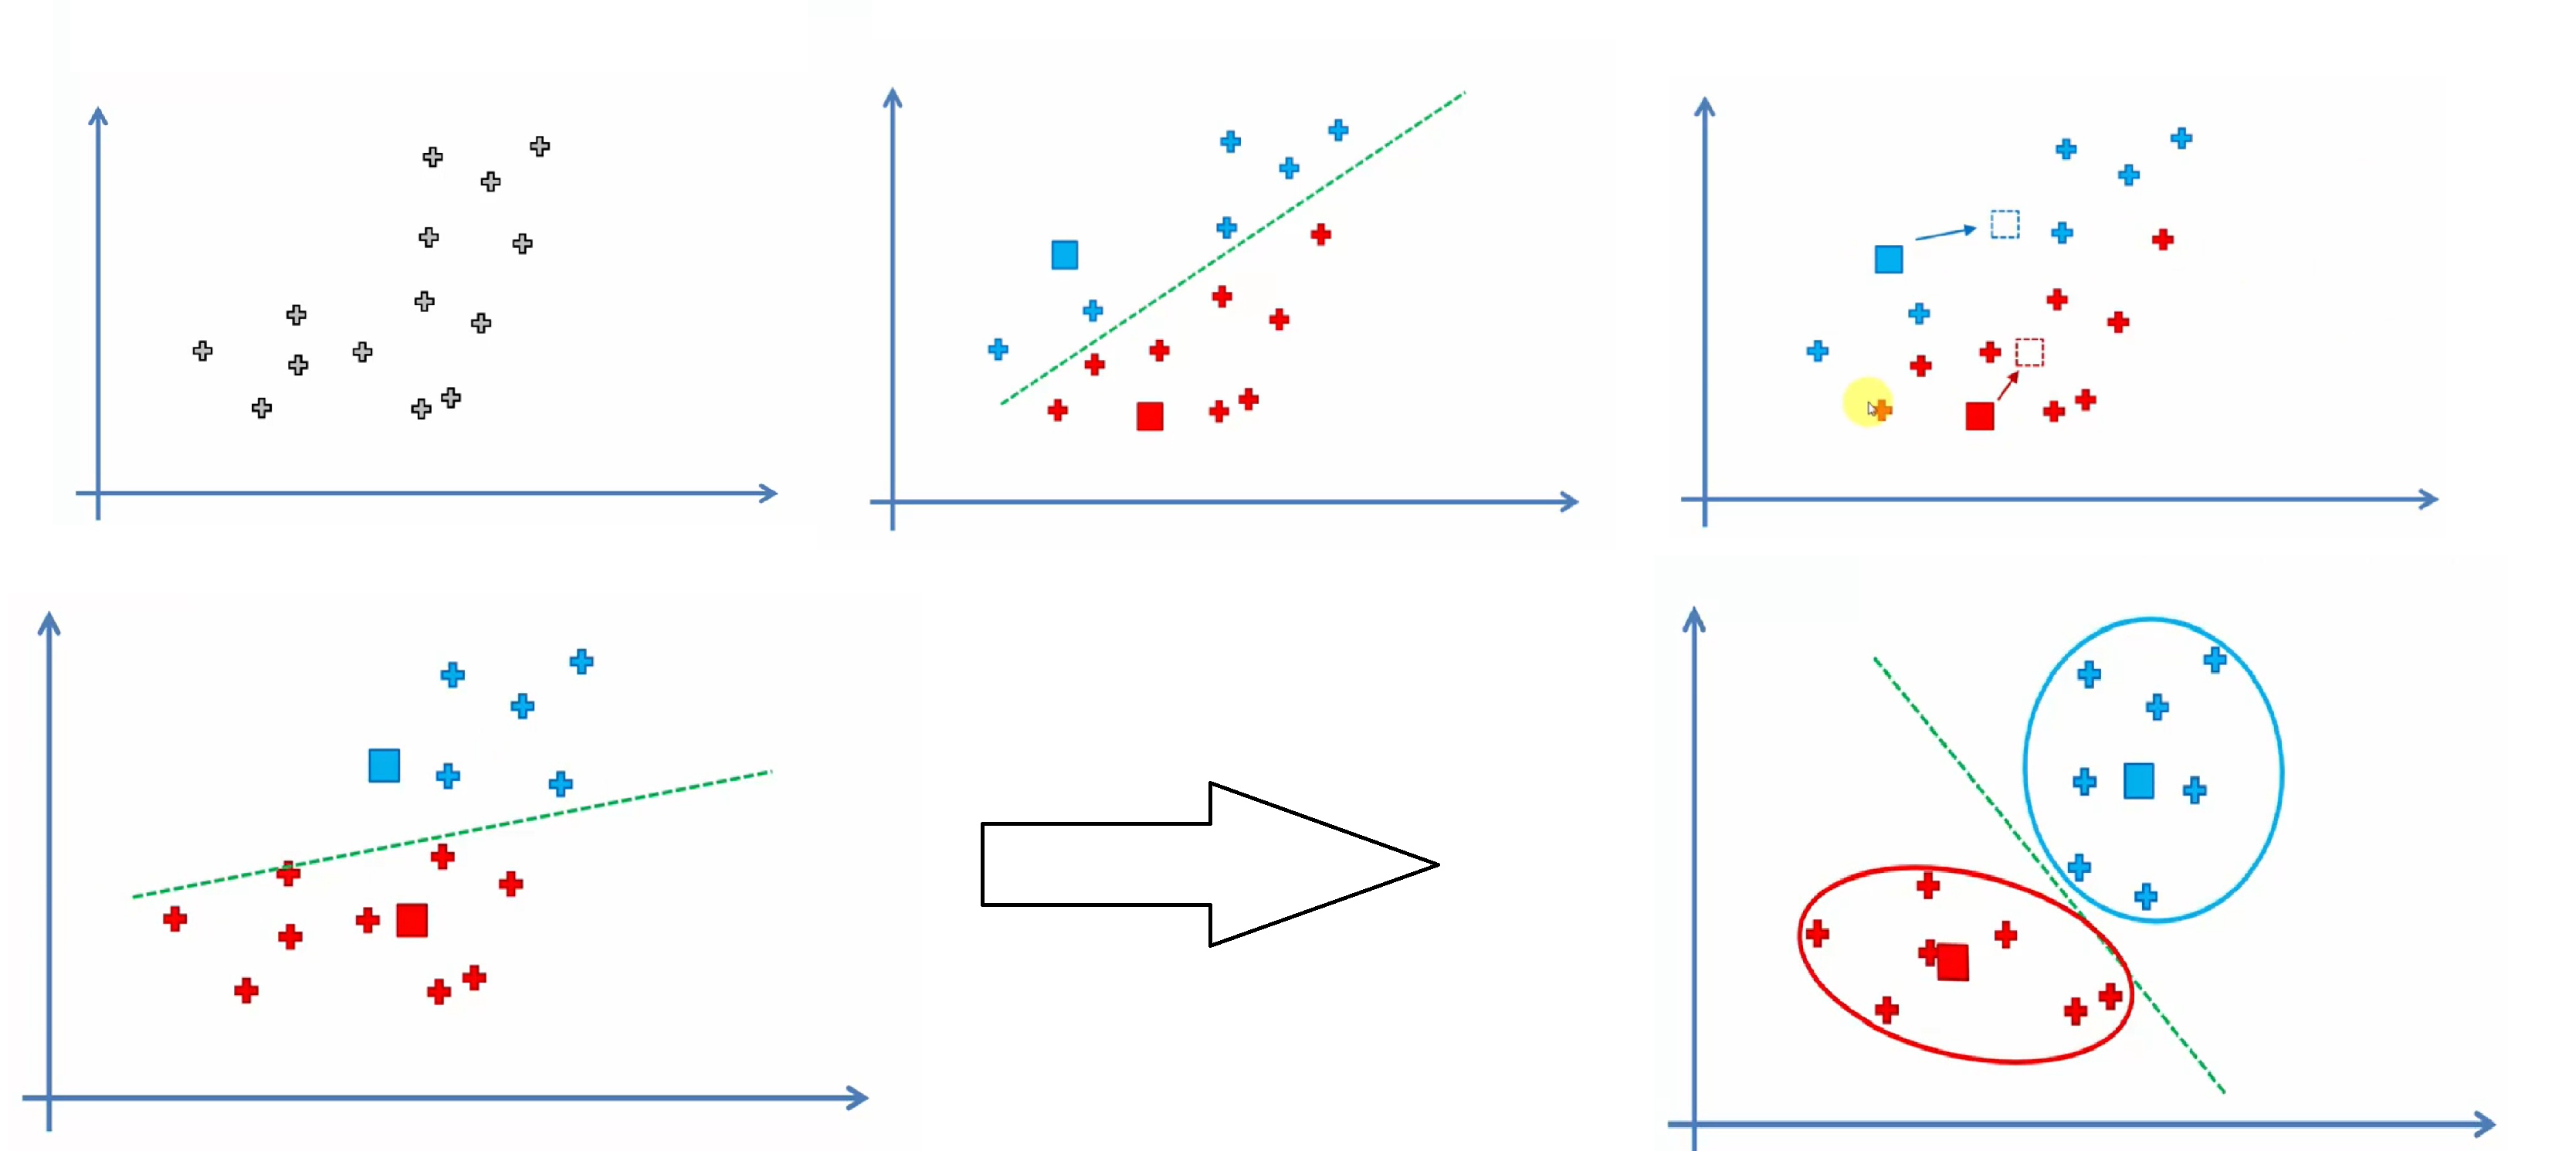

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


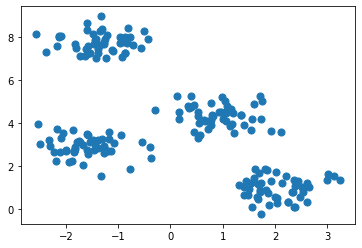

In [7]:
X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=0.5, random_state=0) # n_features=2
plt.scatter(X[:, 0], X[:, 1], s=50);


[2 0 3 1 2 3 0 3 3 3 3 2 0 0 2 3 1 1 1 2 1 0 2 0 2 2 1 2 2 3 1 3 0 2 0 3 0
 3 3 1 1 1 1 3 2 0 3 1 1 3 1 0 0 1 3 1 0 2 3 2 1 3 2 3 1 3 2 1 0 0 2 2 3 3
 0 1 0 0 2 2 1 3 2 0 0 3 3 2 0 0 1 1 1 3 3 2 0 1 3 3 1 2 2 1 1 0 3 2 2 3 1
 0 0 2 2 3 0 0 1 3 1 0 3 2 3 0 3 0 2 3 0 2 0 1 1 0 1 1 2 1 2 0 2 2 0 2 3 2
 0 1 1 1 3 0 2 3 1 0 1 2 1 2 2 0 0 1 3 2 2 0 2 3 0 1 1 1 3 3 0 3 0 2 3 2 3
 0 0 1 3 1 2 2 3 1 0 0 0 3 1 2]


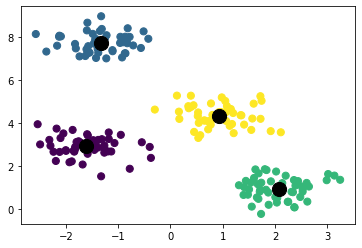

In [10]:
cluster = KMeans(n_clusters=4)
cluster.fit(X)
y_kmeans = cluster.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);
print(y_kmeans)

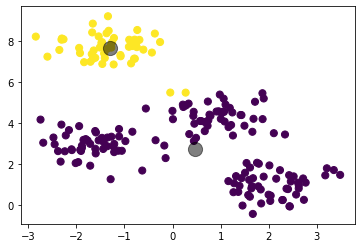

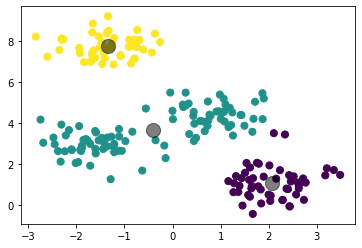

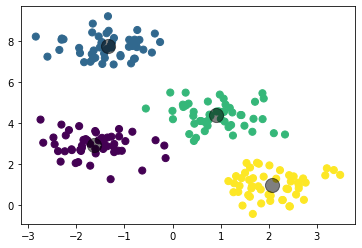

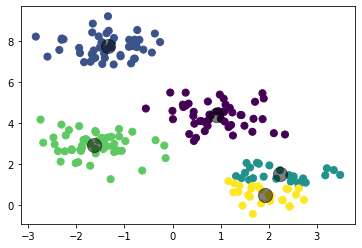

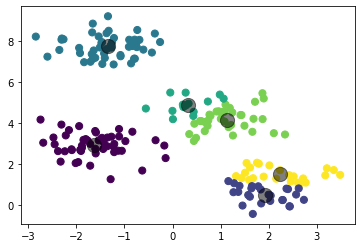

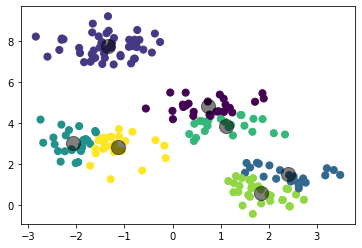

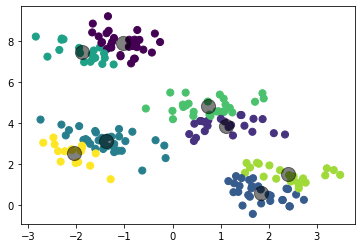

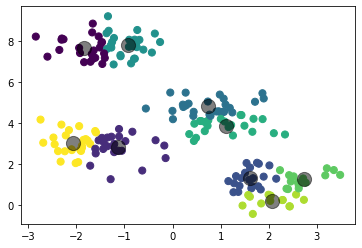

In [7]:
inertias = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()
    inertias.append(kmeans.inertia_)
    

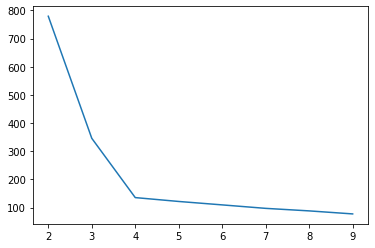

In [8]:
plt.plot(range(2,10),inertias)

# Kmeans on digits

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


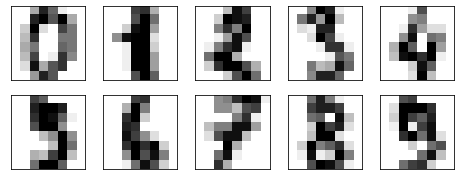

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)
print(digits.data[0])
print(digits.target[0])

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, digits.data[:10].reshape(10, 8, 8)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center,cmap=plt.cm.binary)


In [36]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(clusters)
kmeans.cluster_centers_.shape

[5 7 7 ... 7 3 3]


(10, 64)

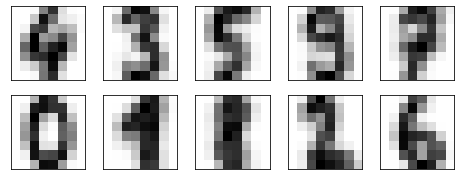

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)